In [49]:
#import necessesary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

StatementMeta(sparkpool, 2, 49, Finished, Available)

In [50]:
#read the dataset
df = pd.read_csv('abfss://ytdata@ytdataset.dfs.core.windows.net/transformeddata/cleaned_data/part-00000-tid-6514828964931822199-b92e0e68-8c89-4212-ab24-c37aad049a3d-61-1-c000.csv')

StatementMeta(sparkpool, 2, 50, Finished, Available)

In [51]:
# Display the first few rows of the dataframe
print(df.head())

StatementMeta(sparkpool, 2, 51, Finished, Available)

   totalviews/channelelapsedtime                 channelId  videoCategoryId  \
0                              0  UCdzU3DSGzyWzN2118yd9X9g               22   
1                              1  UC0UnhAG47DRyVZGVcbhAXhQ               10   
2                              0  UCXjtAvK5P3wXBGh0vbGylzg               27   
3                             25  UCeKHMeUlcLNPLCLUfZUQI2w               26   
4                             52  UCNWPDyaWf2eAHnofFLSnEMg               20   

   channelViewCount  likes/subscriber  views/subscribers  videoCount  \
0             14654                 0                 95          30   
1            105909                 0                 59          51   
2             48265                 0                 10          72   
3           2116722                 0                  0         172   
4           1649075                 0                 10        2777   

   subscriberCount      videoId  dislikes/views  ...  comments/views  \
0               18  

In [52]:
# Drop irrelevant columns
df.drop(['channelId', 'videoId', 'videoPublished'], axis=1, inplace=True)

StatementMeta(sparkpool, 2, 52, Finished, Available)

In [29]:
# Convert data types if necessary
df['videoCategoryId'] = df['videoCategoryId'].astype('category')


StatementMeta(sparkpool, 2, 29, Finished, Available)

In [30]:
# Check for missing values
print(df.isnull().sum())

StatementMeta(sparkpool, 2, 30, Finished, Available)

totalviews/channelelapsedtime    0
videoCategoryId                  0
channelViewCount                 0
likes/subscriber                 0
views/subscribers                0
videoCount                       0
subscriberCount                  0
dislikes/views                   0
channelelapsedtime               0
comments/subscriber              0
likes/views                      0
channelCommentCount              0
videoViewCount                   0
likes/dislikes                   0
comments/views                   0
totvideos/videocount             0
elapsedtime                      0
videoLikeCount                   0
videoDislikeCount                0
dislikes/subscriber              0
totviews/totsubs                 0
views/elapsedtime                0
VideoCommentCount                0
dtype: int64


StatementMeta(sparkpool, 2, 31, Finished, Available)

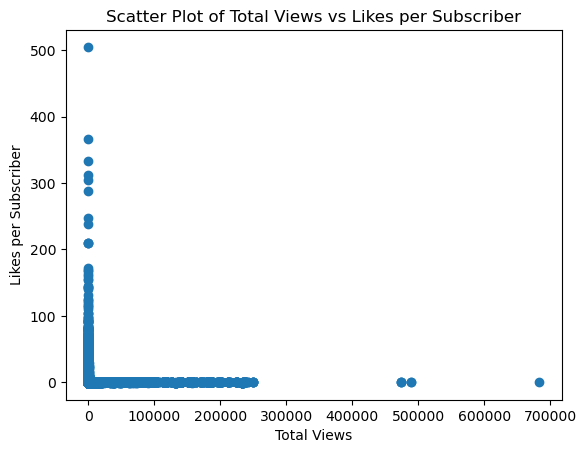

In [31]:
#Scatter plot between 'totalviews/channelelapsedtime' and 'likes_subscriber'
plt.scatter(df['totalviews/channelelapsedtime'], df['likes/subscriber'])
plt.title('Scatter Plot of Total Views vs Likes per Subscriber')
plt.xlabel('Total Views')
plt.ylabel('Likes per Subscriber')
plt.show()

StatementMeta(sparkpool, 2, 39, Finished, Available)

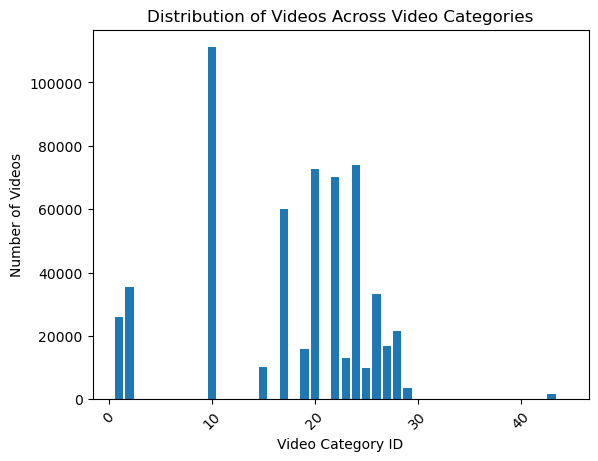

In [39]:
video_category_counts = df['videoCategoryId'].value_counts()
plt.bar(video_category_counts.index, video_category_counts.values)
plt.title('Distribution of Videos Across Video Categories')
plt.xlabel('Video Category ID')
plt.ylabel('Number of Videos')
plt.xticks(rotation=45)
plt.show()

StatementMeta(sparkpool, 2, 40, Finished, Available)

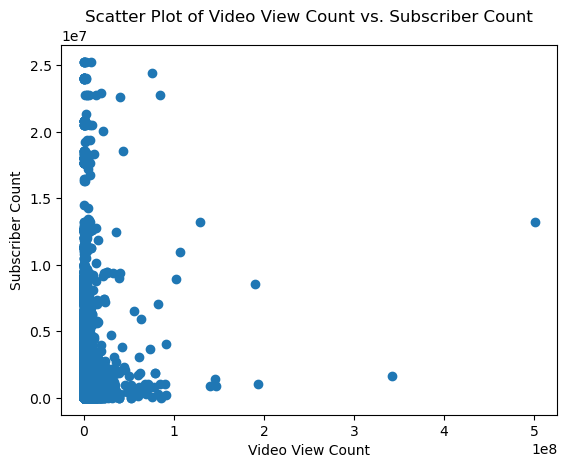

In [40]:
plt.scatter(df['videoViewCount'], df['subscriberCount'])
plt.title('Scatter Plot of Video View Count vs. Subscriber Count')
plt.xlabel('Video View Count')
plt.ylabel('Subscriber Count')
plt.show()

In [45]:
# Data splitting
X = df.drop('totalviews/channelelapsedtime', axis=1)
y = df['totalviews/channelelapsedtime']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

StatementMeta(sparkpool, 2, 45, Finished, Available)

In [55]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize the KNN regressor with the desired number of neighbors
knn = KNeighborsRegressor(n_neighbors=5)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = knn.predict(X_test)

# Calculate Mean Squared Error (MSE) to evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

StatementMeta(sparkpool, 2, 55, Finished, Available)

Mean Squared Error (MSE): 13746822.585537778
